In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import matplotlib as mpl

# Default settings
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use("seaborn-darkgrid")

C:\Users\dicky1031\AppData\Local\Temp\ipykernel_15488\536399922.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [117]:
mus_types = ['high', 'medium', 'low']
mua_types = ['high', 'medium', 'low']
muscle_types = ['muscle_1', 'muscle_3', 'muscle_5', 'muscle_10']
result_folder = "overall_result"
os.makedirs(os.path.join("pic", result_folder), exist_ok=True)

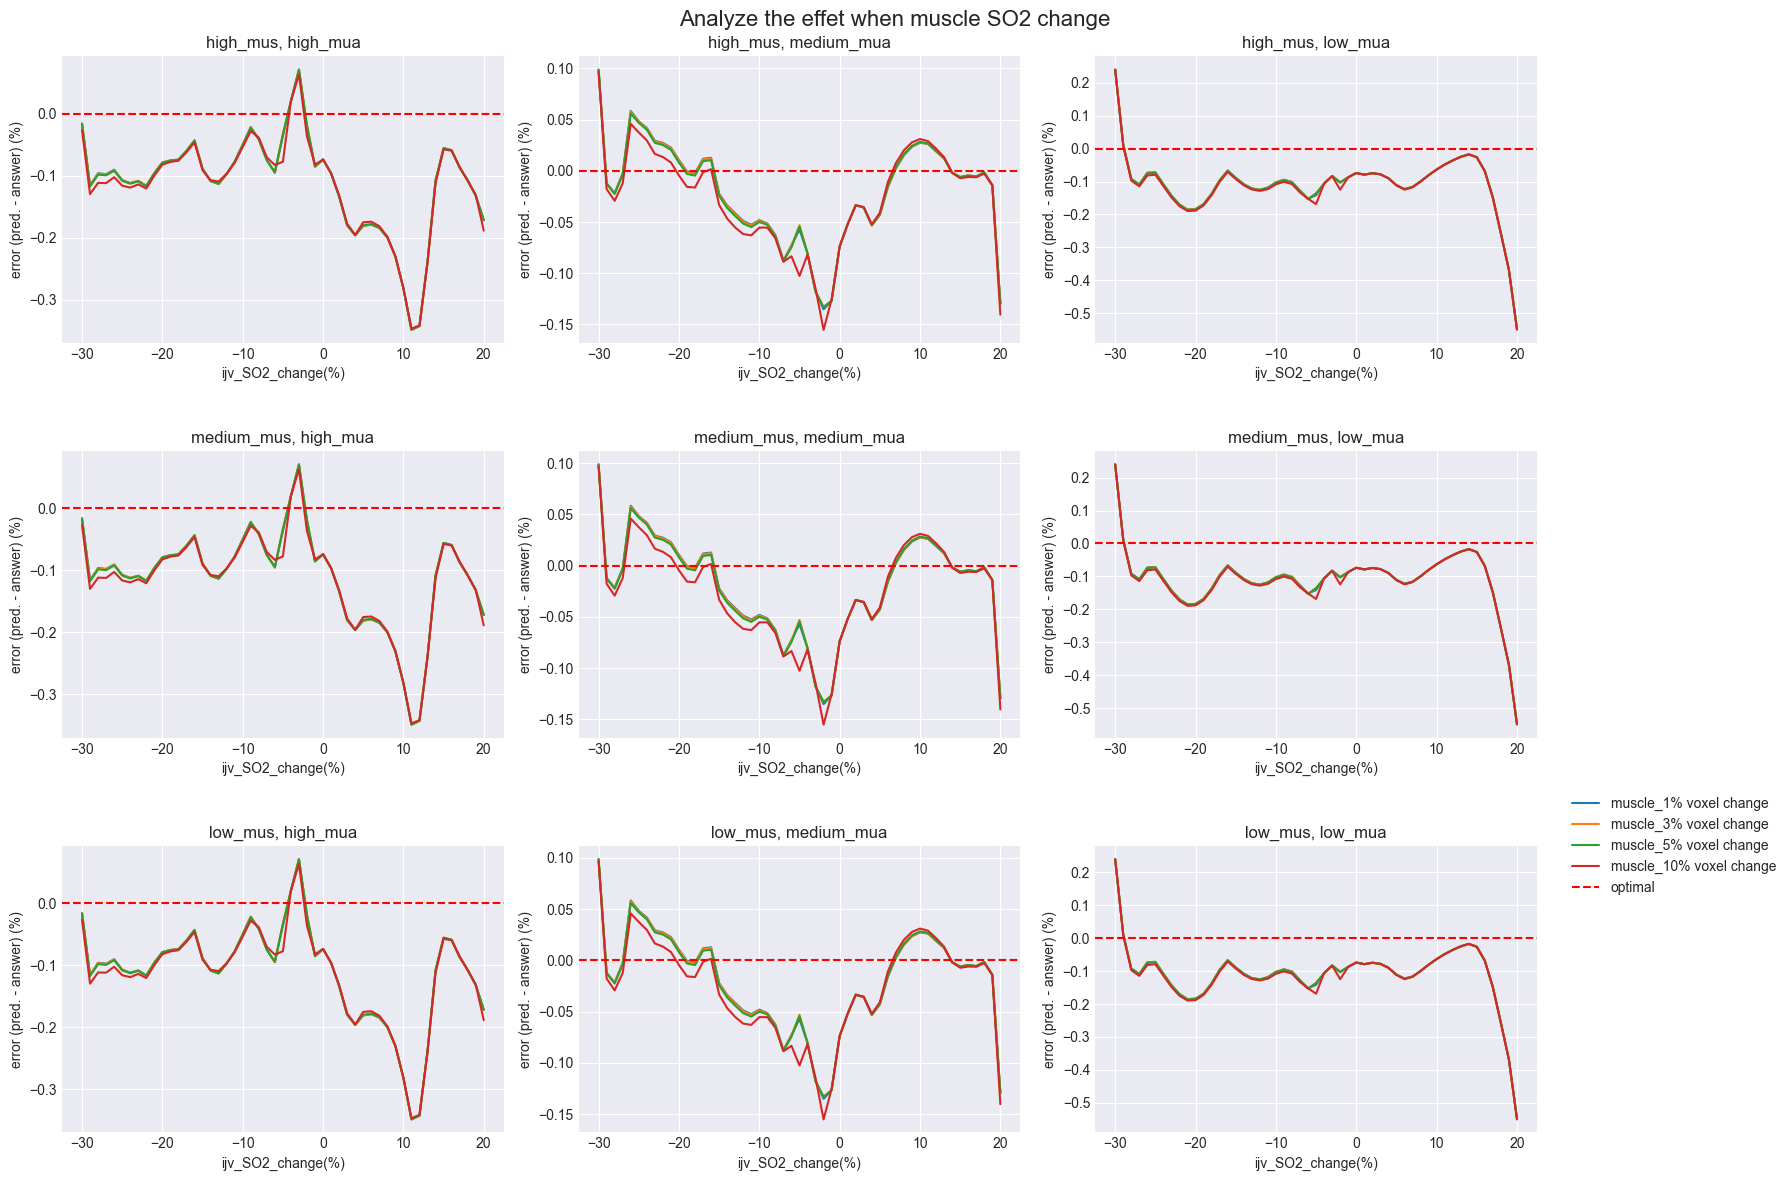

In [118]:
fig = plt.figure(figsize=(18,12))
fig.suptitle("Analyze the effet when muscle SO2 change", fontsize=16)
count = 1
for mus_type in mus_types:
    for mua_type in mua_types:
        ax = plt.subplot(int(f"33{count}"))
        ax.set_title(f"{mus_type}_mus, {mua_type}_mua")
        count += 1
        for muscle_type in muscle_types:
            data = pd.read_csv(os.path.join("model_test",f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            target_ijv_SO2 = data['target_ijv_SO2'].unique()
            
            error_df = {}
            error_mean = []
            for using_SO2 in target_ijv_SO2:
                error_df[using_SO2] = []
                error_df[using_SO2] += data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_list()
                error_mean.append(data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].mean())
            
            ax.plot(target_ijv_SO2.astype(int), error_mean, label=f'{muscle_type}% voxel change')
        ax.axhline(y=0, color='r', linestyle='--',label="optimal")
        ax.set_xlabel("ijv_SO2_change(%)")
        ax.set_ylabel("error (pred. - answer) (%)")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 1),
          fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig(os.path.join("pic", result_folder, "individual.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

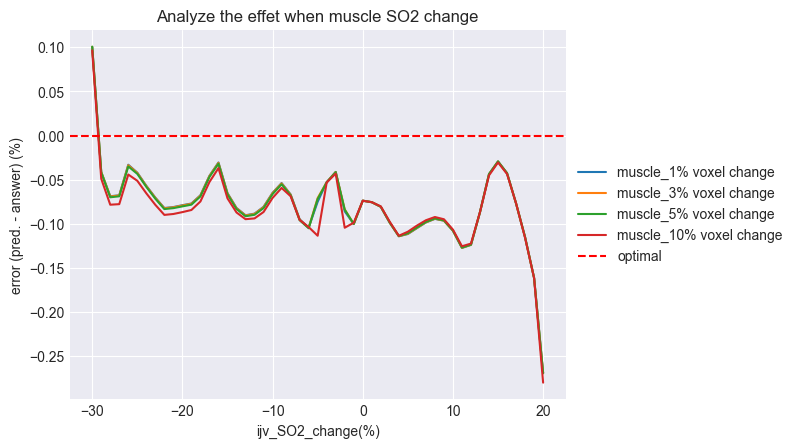

In [119]:
for muscle_type in muscle_types:
    count = 0
    for mus_type in mus_types:
        for mua_type in mua_types:
            if count == 0:
                data = pd.read_csv(os.path.join("model_test",f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            else:
                temp = pd.read_csv(os.path.join("model_test",f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                data = pd.concat((data, temp))
            count += 1
    
    error_df = {}
    error_mean = []
    for using_SO2 in target_ijv_SO2:
        error_df[using_SO2] = []
        error_df[using_SO2] += data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_list()
        error_mean.append(data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].mean())
    plt.plot(target_ijv_SO2.astype(int), error_mean, label=f'{muscle_type}% voxel change')
plt.axhline(y=0, color='r', linestyle='--',label="optimal")
plt.title("Analyze the effet when muscle SO2 change")
plt.xlabel("ijv_SO2_change(%)")
plt.ylabel("error (pred. - answer) (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join("pic", result_folder, "all.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()